<a href="https://colab.research.google.com/github/RH00000/UH_RTS_Research_ML/blob/main/CNN_CIFAR10_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 7

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


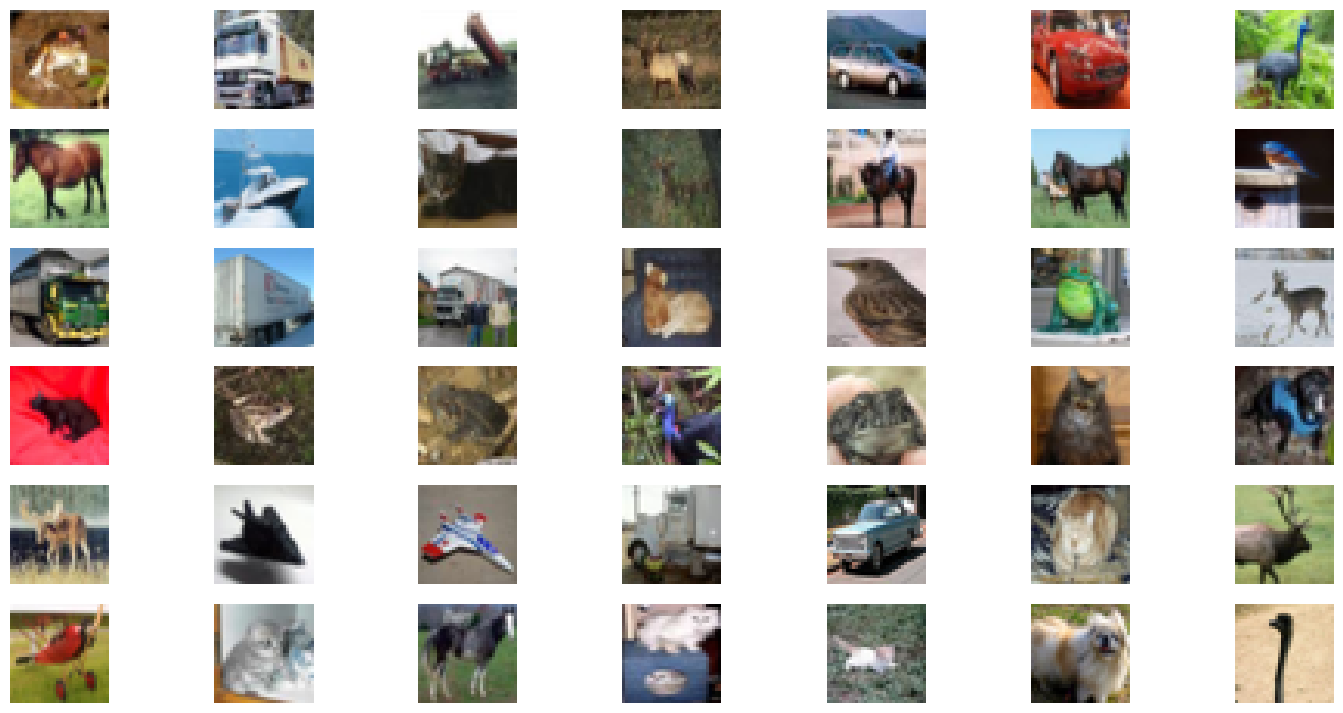

In [4]:
plt.figure(figsize=(18, 9))

num_rows = 6
num_cols = 7

#plot each of the images in the batch
for i in range(num_rows*num_cols):
  ax = plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(x_train[i,:,:])
  plt.axis("off")

In [5]:
#normalize images to the range [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#change the labels from integer to categorical data
print("Original (integer) label for the first training sample: ", y_train[0])

#convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("After conversion to categorical one-hot encoded labels: ", y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
@dataclass(frozen=True)
class DatasetConfig:
  NUM_CLASS: int = 10
  IMG_HEIGHT: int = 32
  IMG_WIDTH: int = 32
  NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
  EPOCHS: int = 31
  BATCH_SIZE: int = 256
  LEARNING_RATE: float = 0.001

In [7]:
def cnn_model_dropout(input_shape=(32,32,3)):
  model = Sequential()

  #Block 1: 32 filters, maxpooling,  dropout
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #Block 2: 64 filters, maxpooling
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #Block 3: 64 filters, maxpooling
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  #Flatten conv features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  return model

In [9]:
#Create model
model_dropout = cnn_model_dropout()
model_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_dropout.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model_dropout.fit(x_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1468 - loss: 2.2512 - val_accuracy: 0.2866 - val_loss: 1.9865
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.3080 - loss: 1.9209 - val_accuracy: 0.3374 - val_loss: 1.7947
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.3790 - loss: 1.6924 - val_accuracy: 0.4449 - val_loss: 1.4980
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.4466 - loss: 1.5195 - val_accuracy: 0.4841 - val_loss: 1.3956
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.4842 - loss: 1.4173 - val_accuracy: 0.5118 - val_loss: 1.3652
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5280 - loss: 1.3034 - val_accuracy: 0.5783 - val_loss: 1.1850
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5639 - loss: 1.2109 - val_accuracy: 0.6086 - val_loss: 1.1016
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5956 - loss: 1.1465 - val_accu

In [17]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

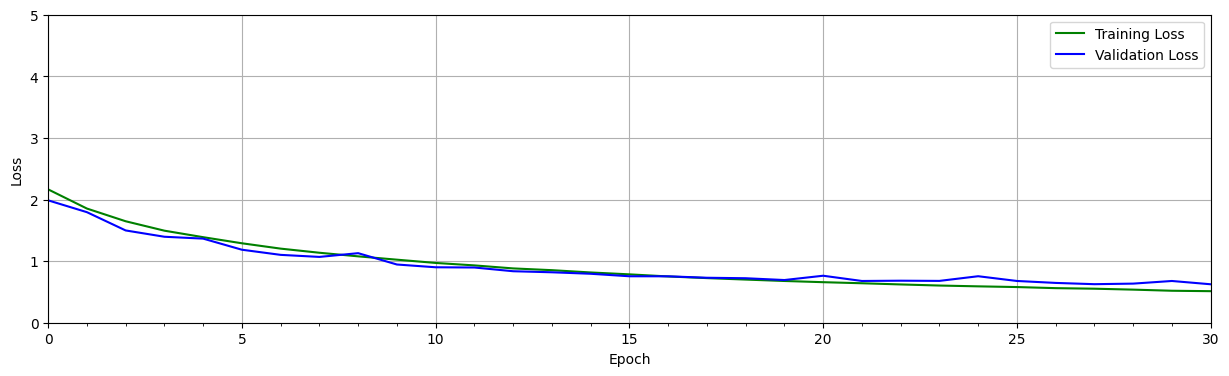

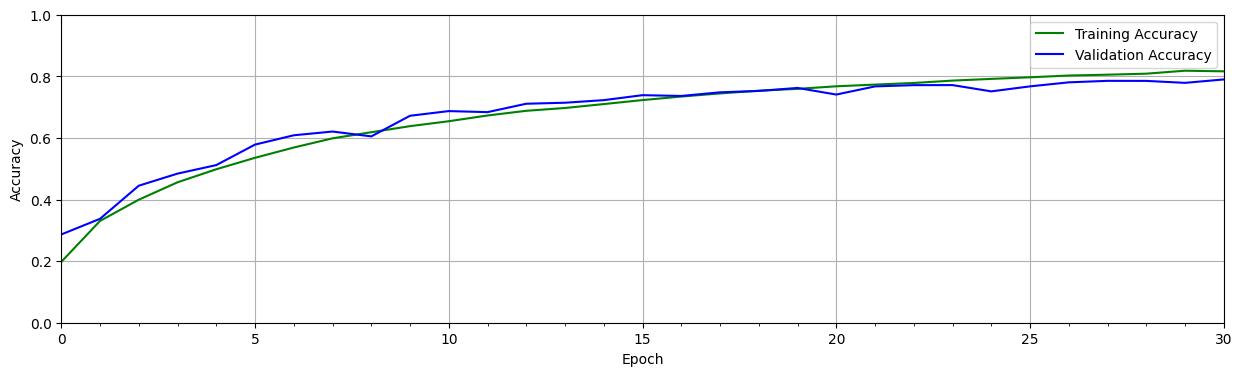

In [18]:
#Plot training results.
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

plot_results([train_loss, valid_loss],
             ylabel='Loss',
             ylim=[0.0, 5.0],
             metric_name=['Training Loss', 'Validation Loss'],
             color=['g','b'])

plot_results([train_acc, valid_acc],
             ylabel='Accuracy',
             ylim = [0.0, 1.0],
             metric_name=['Training Accuracy', 'Validation Accuracy'],
             color=['g','b'])

In [21]:
#Using save() method to save the model to the file system in the 'SavedModel' format
model_dropout.save('model_dropout.keras')

In [22]:
#Saving to local machine
from google.colab import files
files.download('model_dropout.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
#Load the saved model to evaluate
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.keras')

In [26]:
test_loss, test_acc = reloaded_model_dropout.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.7901 - loss: 0.6334
Test accuracy: 78.400


In [27]:
#Model evaluation (copied)
def evaluate_model(dataset, model):

    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction accuracy:  1.0


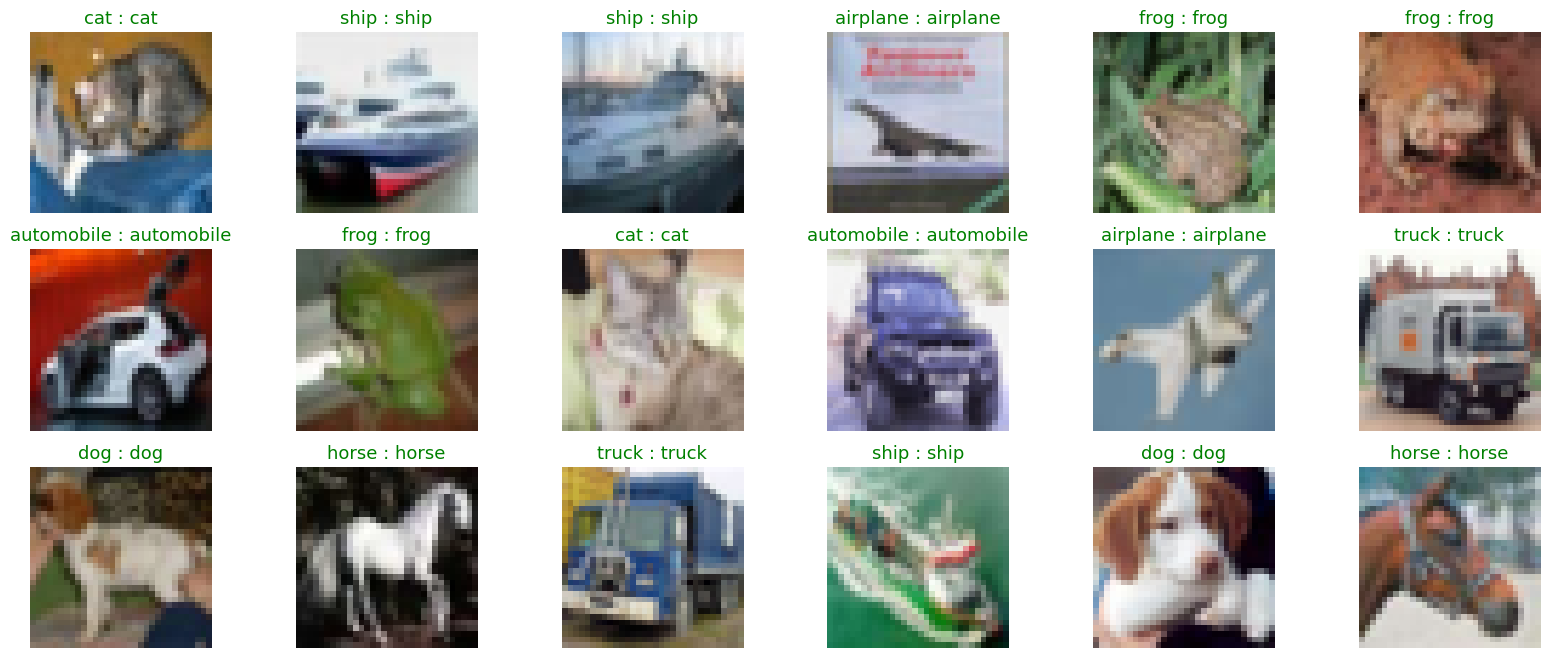

In [29]:
evaluate_model(x_test, reloaded_model_dropout)

In [30]:
#Generate predictions for the test dataset
predictions = reloaded_model_dropout.predict(x_test)

#For each sample image in test dataset, select class label with the highest probability
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


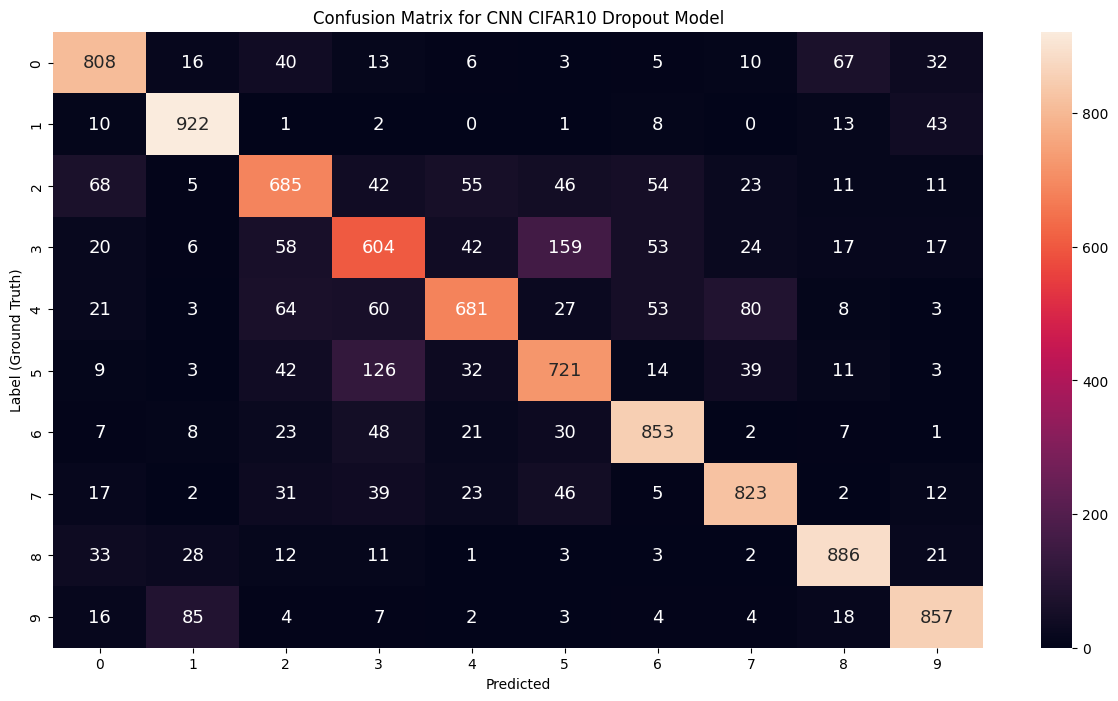

In [33]:
#Convert one-hot encoded labels to integers
y_test_integer_labels = tf.argmax(y_test, axis=1)

#Generate a confusion matrix for test data
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

#Plot the confusion matrix as a heatmap
plt.figure(figsize=[15,8])

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 13})
plt.title('Confusion Matrix for CNN CIFAR10 Dropout Model')
plt.xlabel('Predicted')
plt.ylabel('Label (Ground Truth)')
plt.show()